In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate

import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_excel('../data/Premiums_rest.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [100]:
df.shape

(29904, 13)

In [101]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [102]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

Here we replace all the spaces into '_' and make all the col names in small or lower case

In [103]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [104]:
# Let see the persentage of missing data

df.isna().sum()/df.count()*100

age                      0.000000
gender                   0.000000
region                   0.000000
marital_status           0.000000
number_of_dependants     0.000000
bmi_category             0.000000
smoking_status           0.030105
employment_status        0.003344
income_level             0.030105
income_lakhs             0.000000
medical_history          0.000000
insurance_plan           0.000000
annual_premium_amount    0.000000
dtype: float64

as we can notice the percentage is very low we can drop those missing records

In [105]:
df.dropna(how='any',inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [108]:
df[df['number_of_dependants']<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
1805,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
2273,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
3513,56,Male,Southwest,Married,-3,Normal,Occasional,Salaried,10L - 25L,16,Thyroid,Bronze,11979
3904,26,Male,Southeast,Married,-1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269
4900,37,Male,Northwest,Married,-1,Overweight,Regular,Self-Employed,<10L,8,Diabetes,Bronze,13664
5917,42,Female,Southeast,Unmarried,-3,Overweight,Regular,Self-Employed,<10L,8,Diabetes & Heart disease,Bronze,17779
7095,50,Female,Northwest,Married,-3,Normal,Occasional,Salaried,<10L,4,Diabetes & High blood pressure,Silver,21957
7222,47,Male,Northwest,Unmarried,-3,Overweight,Occasional,Self-Employed,10L - 25L,19,No Disease,Gold,27457
7551,39,Male,Southwest,Unmarried,-1,Overweight,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Silver,18406
9047,47,Male,Northwest,Married,-1,Overweight,Occasional,Self-Employed,25L - 40L,27,High blood pressure,Gold,29812


In [109]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-1, -3])

In [110]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29886 entries, 0 to 29903
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    29886 non-null  int64 
 1   gender                 29886 non-null  object
 2   region                 29886 non-null  object
 3   marital_status         29886 non-null  object
 4   number_of_dependants   29886 non-null  int64 
 5   bmi_category           29886 non-null  object
 6   smoking_status         29886 non-null  object
 7   employment_status      29886 non-null  object
 8   income_level           29886 non-null  object
 9   income_lakhs           29886 non-null  int64 
 10  medical_history        29886 non-null  object
 11  insurance_plan         29886 non-null  object
 12  annual_premium_amount  29886 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


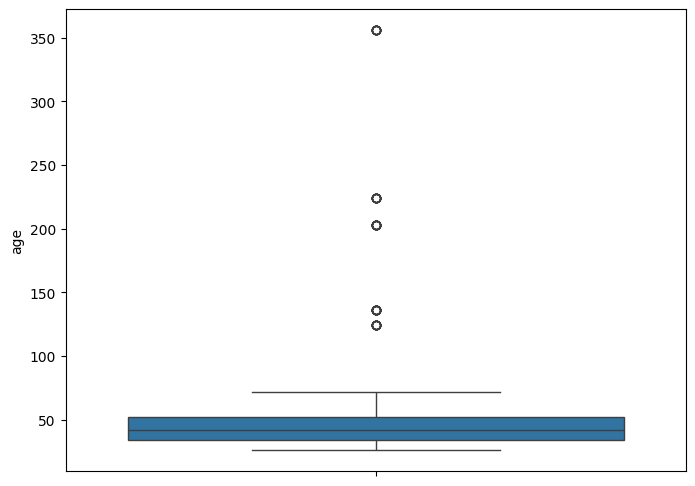

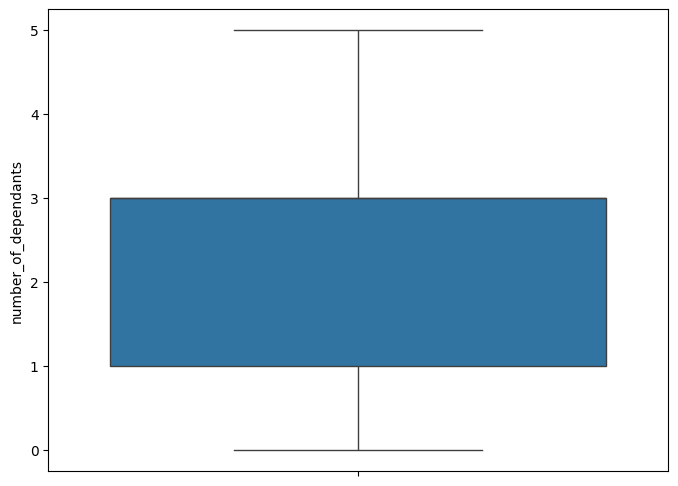

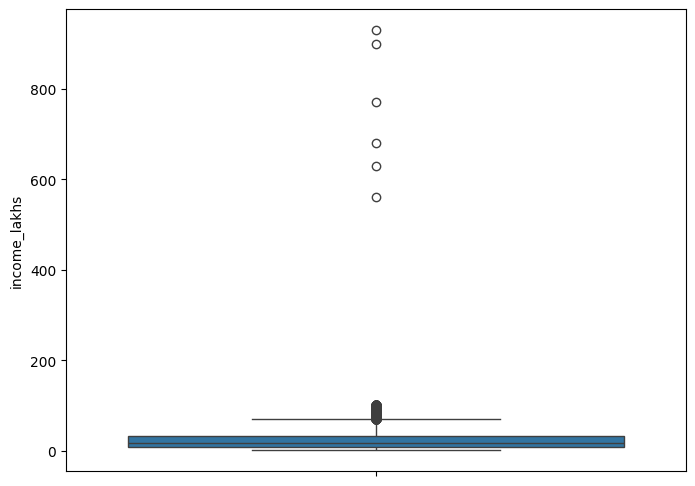

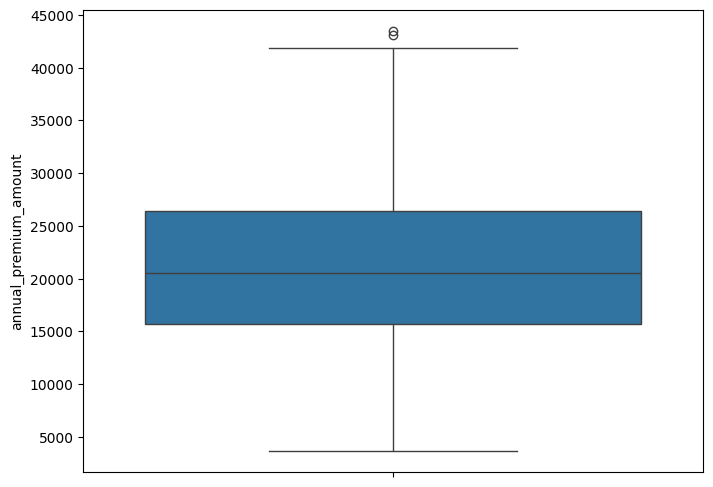

In [112]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(8,6))
        sns.boxplot(df[i])

In [113]:
num_feature = df.select_dtypes(exclude='object').columns
num_feature

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

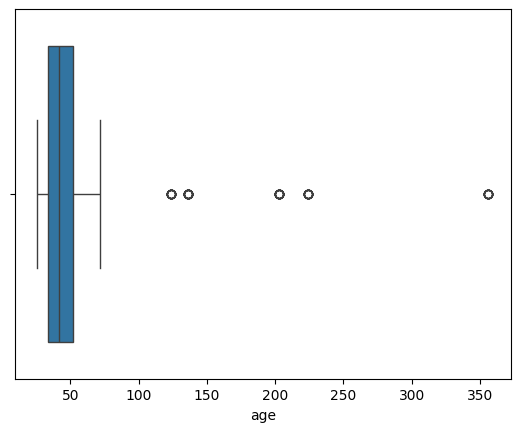

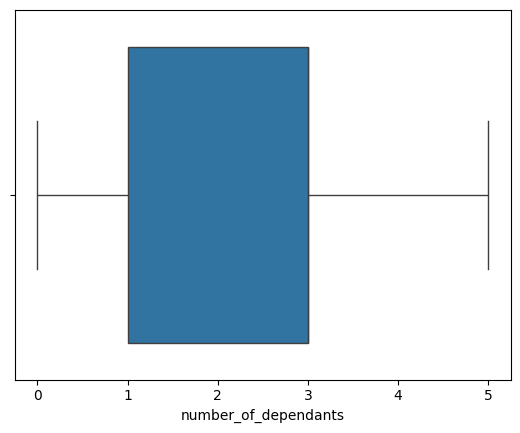

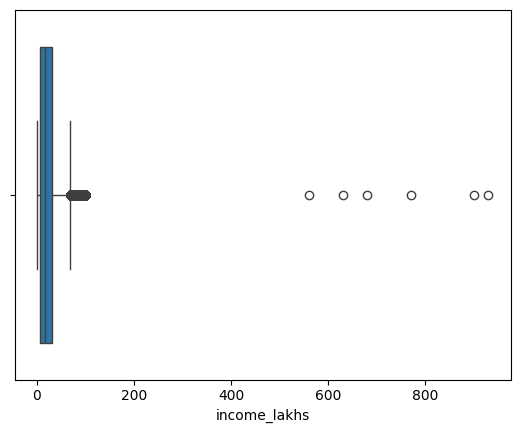

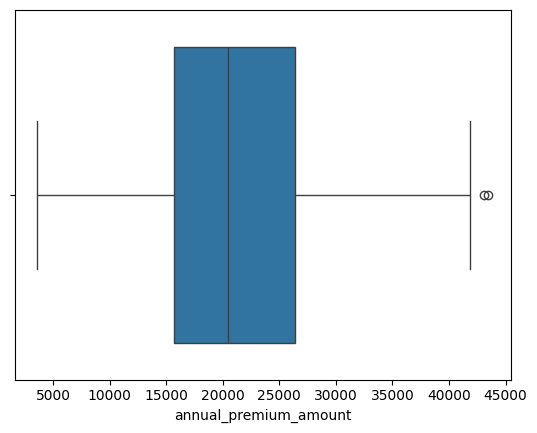

In [114]:
for i in num_feature:
    sns.boxplot(x=df[i])
    plt.show()

In [115]:
# outlier tretment for age

df[df['age']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
77,224,Male,Northeast,Married,3,Normal,Regular,Salaried,25L - 40L,26,No Disease,Gold,27523
488,124,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,46,No Disease,Silver,11752
803,124,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5311
902,124,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,2,Diabetes,Bronze,10238
912,136,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,10L - 25L,15,High blood pressure,Gold,31913
1097,203,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,Diabetes,Bronze,8762
2211,136,Male,Southwest,Married,2,Normal,Regular,Salaried,10L - 25L,20,Diabetes & Thyroid,Gold,31402
2556,203,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,5254
3426,124,Female,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,29,No Disease,Silver,10265
3576,136,Male,Southwest,Married,3,Underweight,Regular,Self-Employed,<10L,2,Heart disease,Silver,26127


In [116]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

as we know it is highly unlikly to have age of a person will be around this [224, 124, 136, 203, 356] list so we are droping those records

In [117]:
df1 = df[df['age']<100].copy()
df1['age'].describe()

count    29828.000000
mean        43.095380
std         11.041991
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max         72.000000
Name: age, dtype: float64

<Axes: xlabel='income_lakhs', ylabel='Count'>

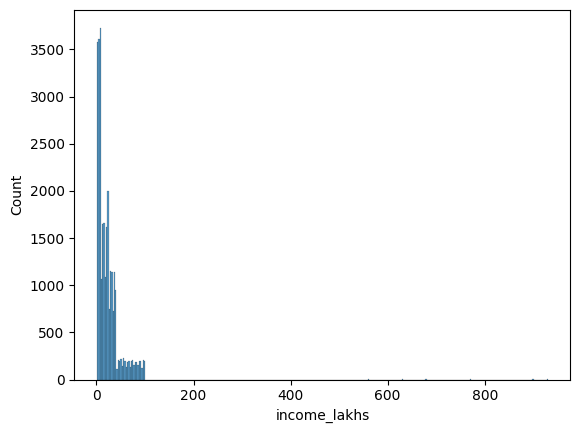

In [118]:
sns.histplot(df1['income_lakhs'])

In [119]:
def get_outliers(col):
    q1,q3 = col.quantile([0.25,0.95])
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr 
    return upper,lower

In [120]:
upper,lower = get_outliers(df1['income_lakhs'])

In [121]:
print(upper,lower)

184.5 -99.5


In [122]:
df1[df1['income_lakhs']>upper].shape

(6, 13)

In [123]:
df2 = df1[df1['income_lakhs']<upper]

In [124]:
df2['income_lakhs'].describe()

count    29822.000000
mean        23.226343
std         22.455408
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        100.000000
Name: income_lakhs, dtype: float64

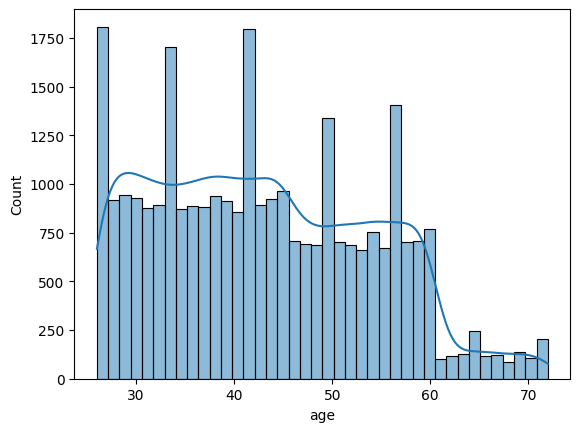

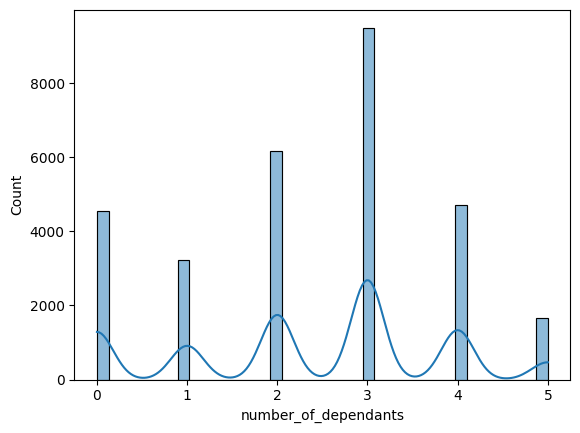

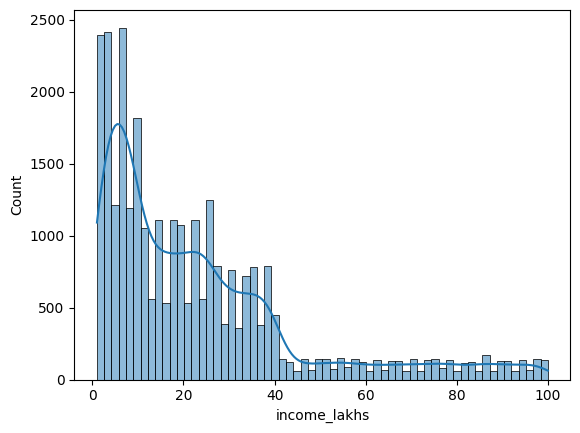

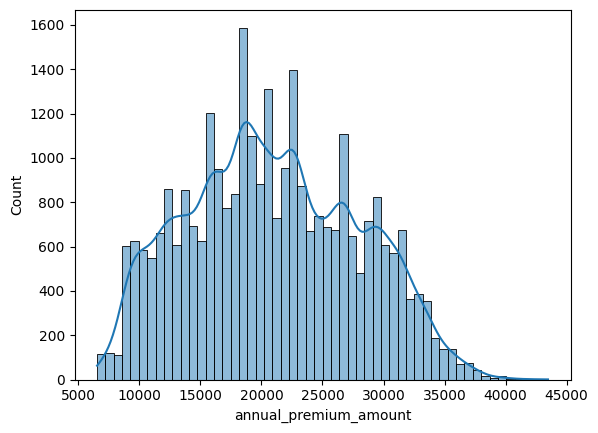

In [125]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.histplot(df2[i],kde=True)
        plt.show()

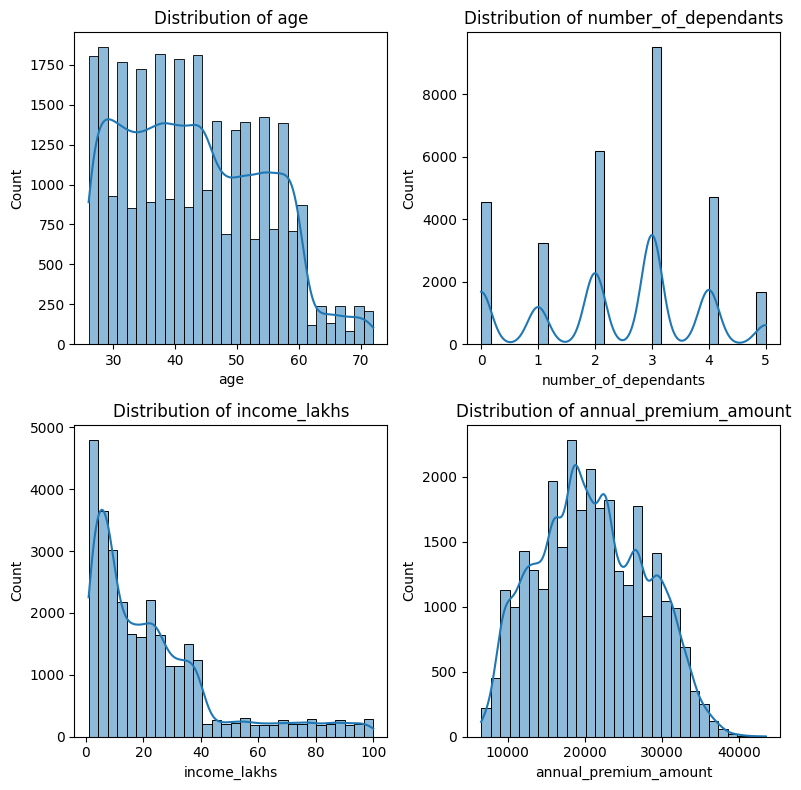

In [126]:
# Select numeric columns
num_cols = [col for col in df2.columns if df2[col].dtype != 'object']

# Define number of columns per row
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(8, 4 * n_rows))

for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

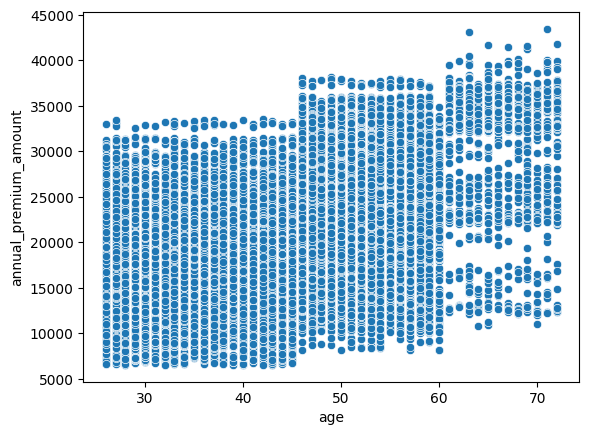

In [127]:
sns.scatterplot(df2,x='age',y='annual_premium_amount')

<Axes: xlabel='age', ylabel='income_lakhs'>

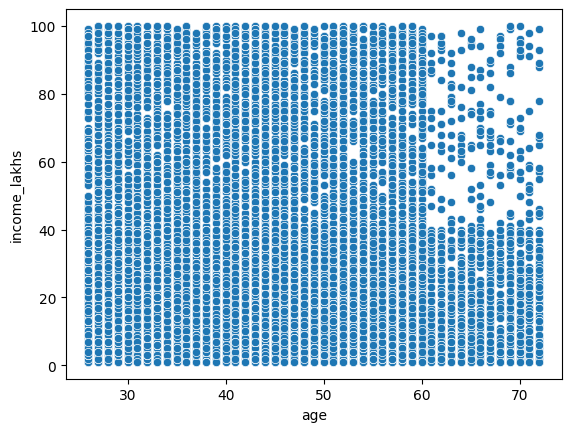

In [128]:
sns.scatterplot(df2,x='age',y='income_lakhs')

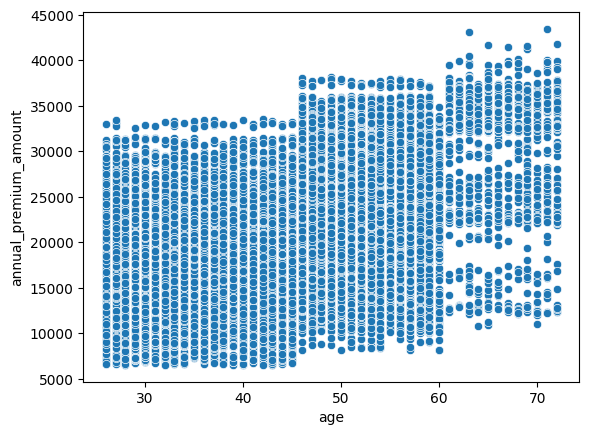

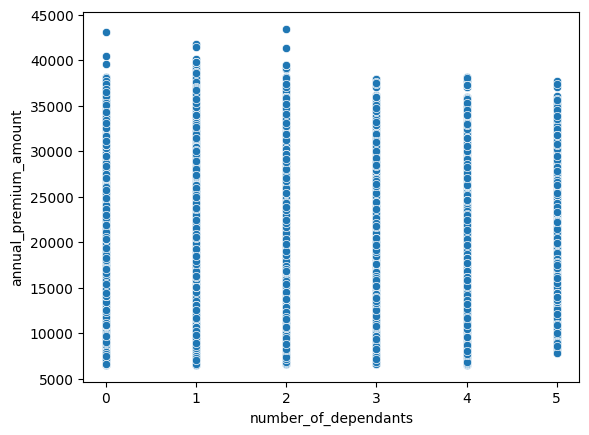

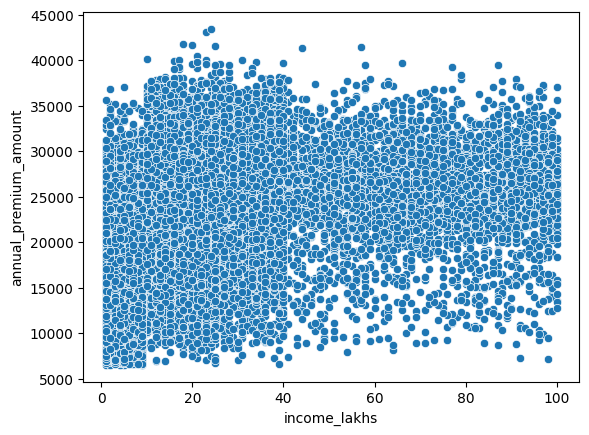

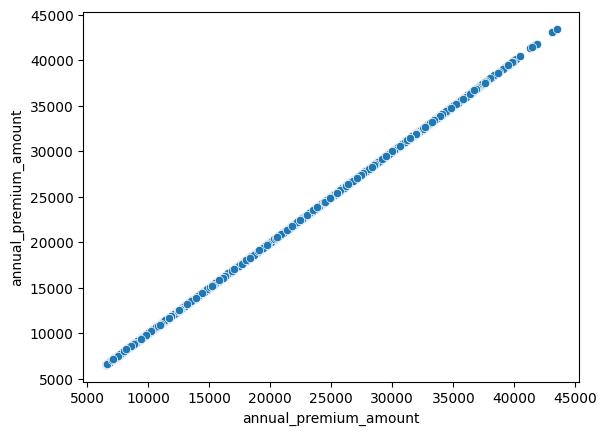

In [129]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.scatterplot(df2,x=i,y='annual_premium_amount')
        plt.show()

In [130]:
cat_features = df2.select_dtypes(include='object').columns
for i in cat_features:
    print(i, ":",df2[i].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [131]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
},inplace=True)

In [132]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

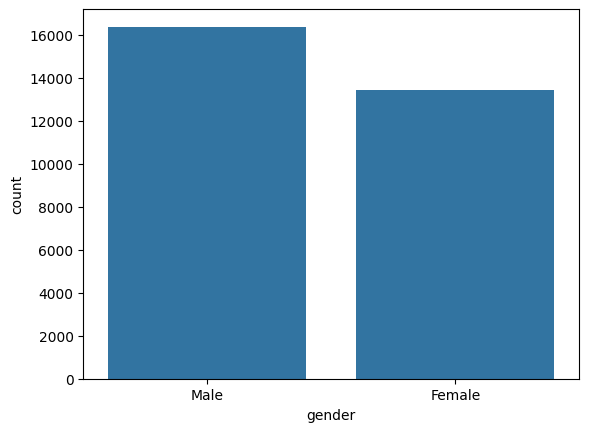

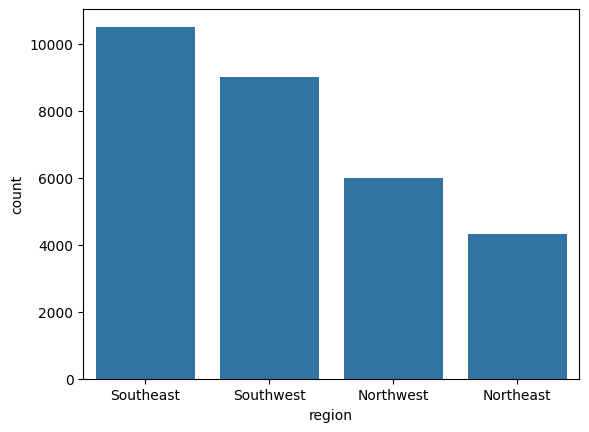

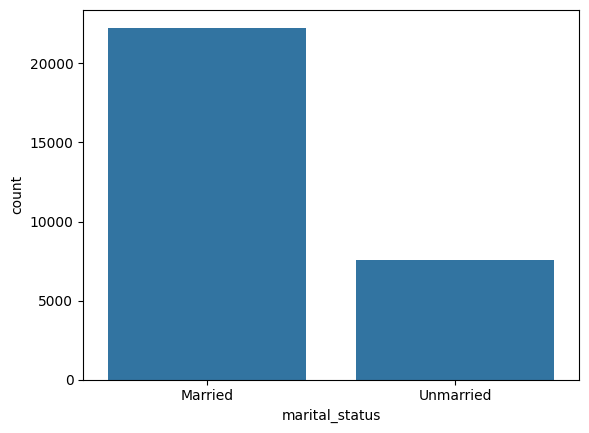

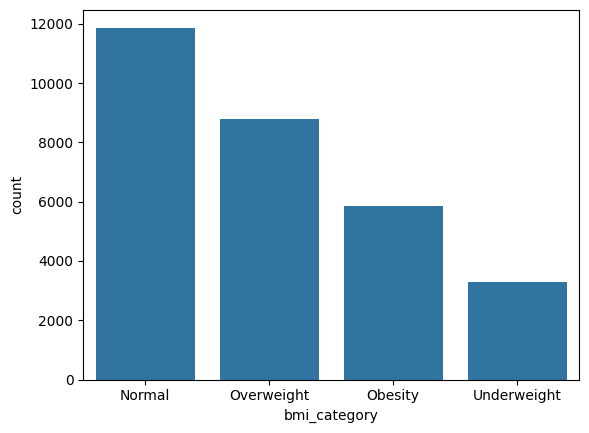

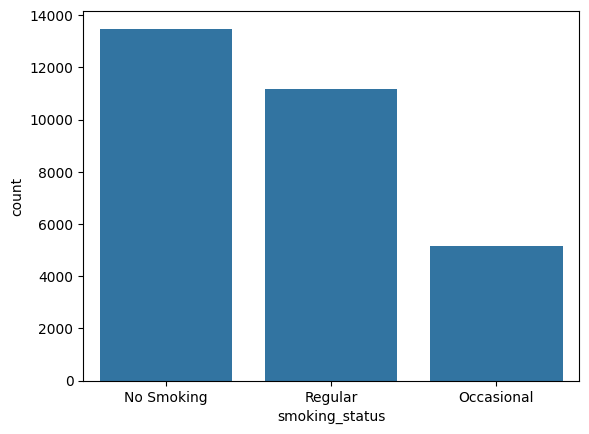

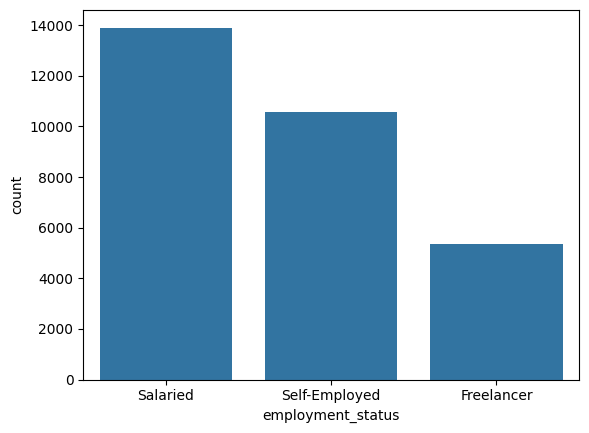

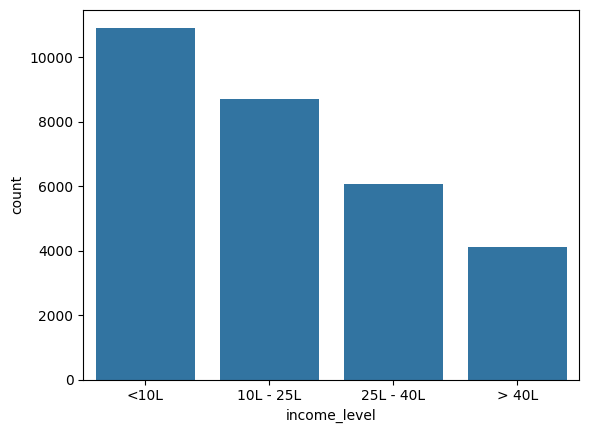

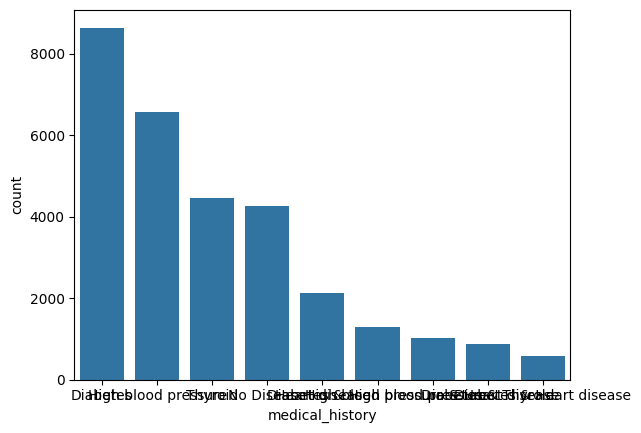

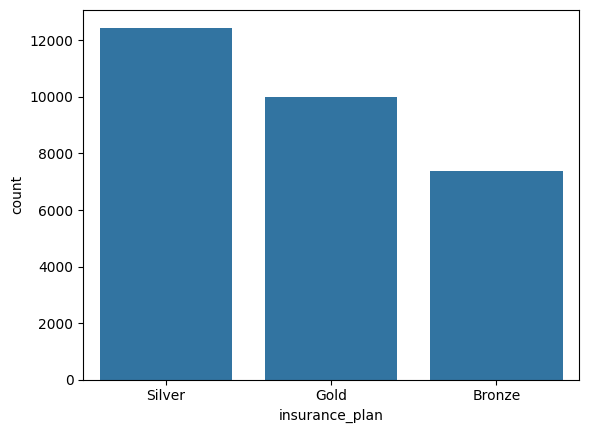

In [133]:
for i in cat_features:
    sns.barplot(df2[i].value_counts())
    plt.show()

In [134]:
for i in cat_features:
    print(df2[i].value_counts(normalize=True))

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64
region
Southeast    0.352693
Southwest    0.301992
Northwest    0.200691
Northeast    0.144625
Name: proportion, dtype: float64
marital_status
Married      0.746664
Unmarried    0.253336
Name: proportion, dtype: float64
bmi_category
Normal         0.398028
Overweight     0.295051
Obesity        0.196835
Underweight    0.110087
Name: proportion, dtype: float64
smoking_status
No Smoking    0.452116
Regular       0.374656
Occasional    0.173228
Name: proportion, dtype: float64
employment_status
Salaried         0.466132
Self-Employed    0.354269
Freelancer       0.179599
Name: proportion, dtype: float64
income_level
<10L         0.366240
10L - 25L    0.291966
25L - 40L    0.203675
> 40L        0.138120
Name: proportion, dtype: float64
medical_history
Diabetes                               0.289853
High blood pressure                    0.220642
Thyroid                                0.149319
No Disease          

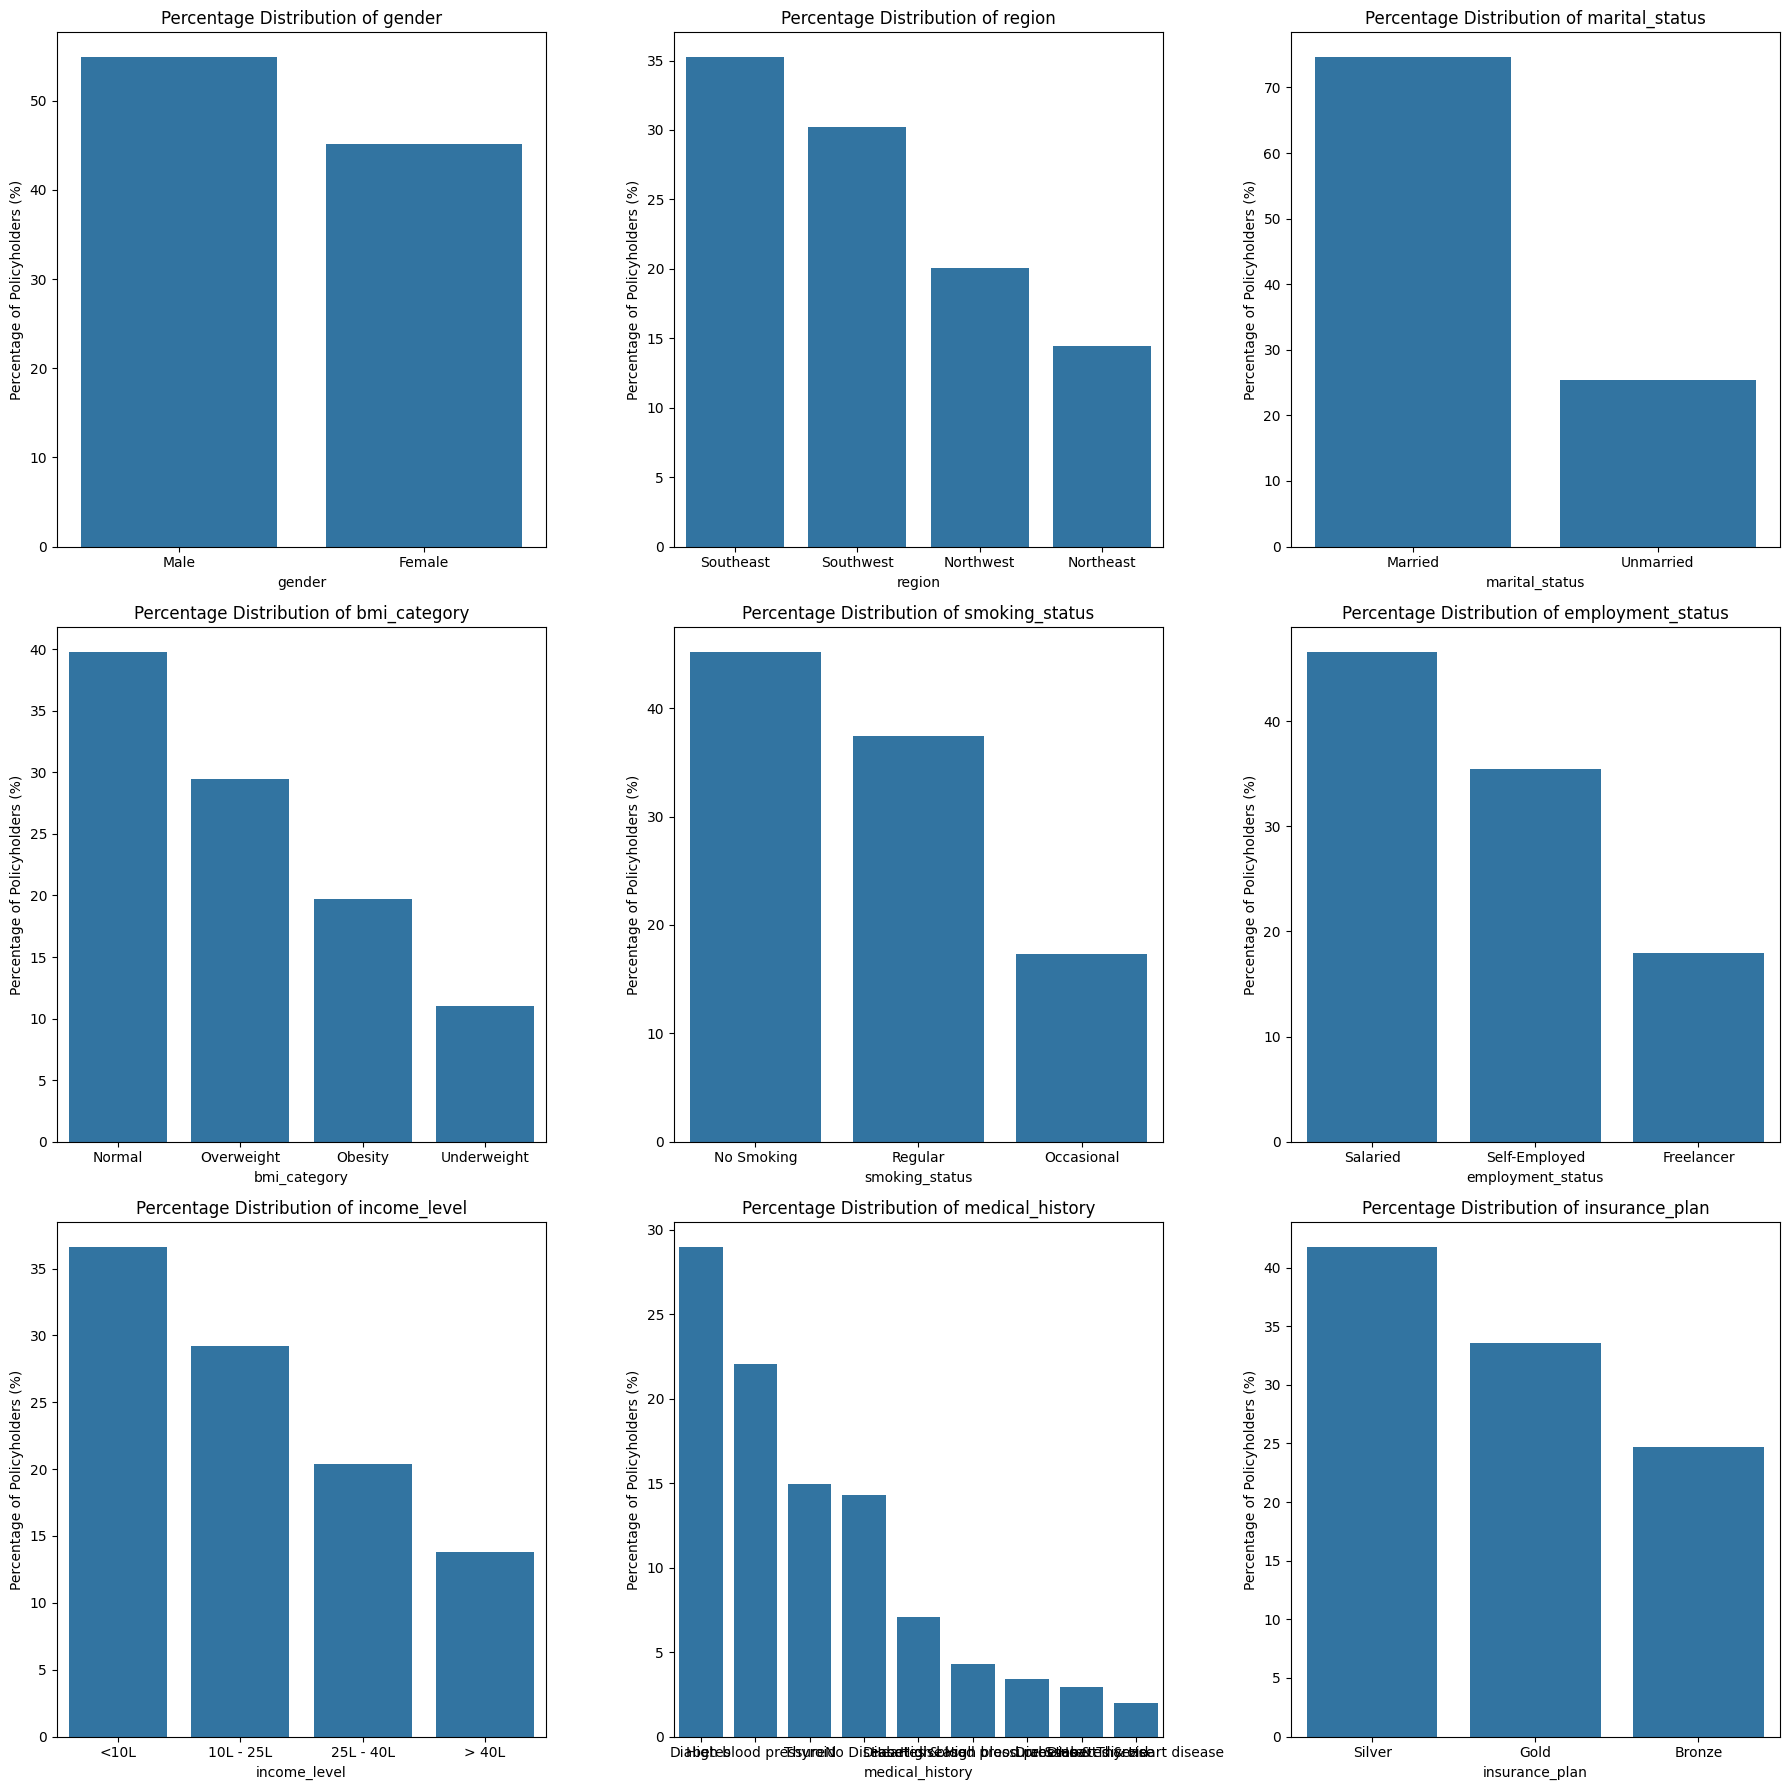

In [135]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()

for ax,col in zip(axes,cat_features):
    cat_count = df2[col].value_counts(normalize=True)*100
    
    sns.barplot(x=cat_count.index,y=cat_count.values,ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(col)
    
plt.tight_layout()
plt.show()

In [136]:
tab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


<Axes: xlabel='income_level'>

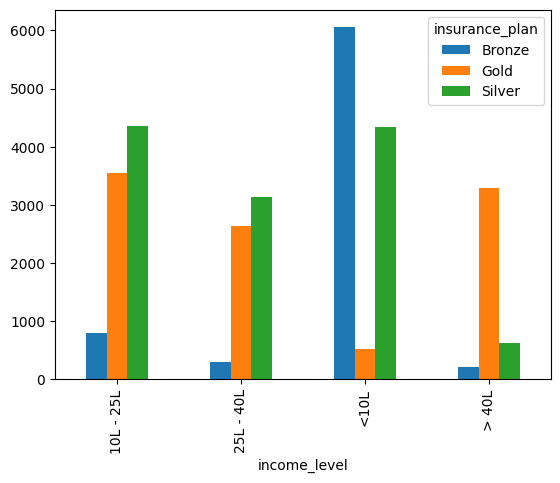

In [137]:
tab.plot(kind='bar')

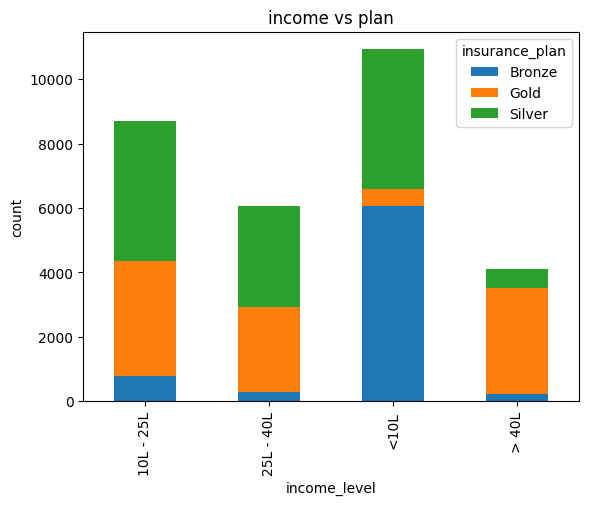

In [138]:
tab.plot(kind='bar',stacked=True)
plt.title('income vs plan')
plt.ylabel('count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

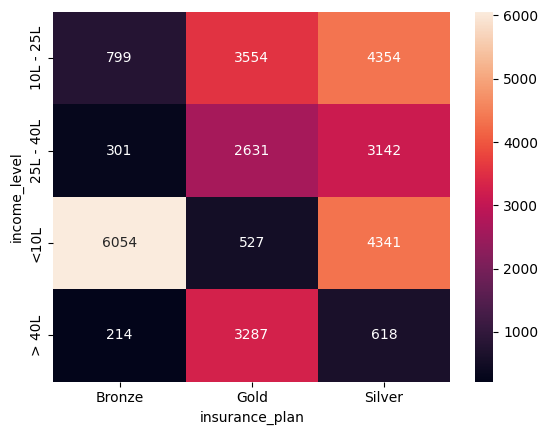

In [139]:
sns.heatmap(tab,annot=True,fmt='d')

In [140]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [141]:
# as per business we have a risk score

risk_score ={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

In [142]:
df2[['disease1','disease2']] = df2['medical_history'].str.split(' & ',expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,None


In [143]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)

In [144]:
df2['total_risk_score'] = 0

for x in ['disease1','disease2']:
    df2['total_risk_score'] += df2[x].map(risk_score)

# Normalised the total_risk

max_score = df2['total_risk_score'].max() 
min_score = df2['total_risk_score'].min()
df2['normalised_risk_score'] = (df2['total_risk_score'] - min_score)/(max_score-min_score)

df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [145]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [146]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2['insurance_plan'].unique()

array([1, 2, 3])

In [147]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [148]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571


In [149]:
df2['income_level'].unique()

array([1, 2, 4, 3])

In [150]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'disease1', 'disease2', 'total_risk_score',
       'normalised_risk_score'],
      dtype='object')

In [151]:
# drop redandant col

df2.drop(columns=['medical_history','disease1', 'disease2', 'total_risk_score'],axis=1,inplace=True)

In [152]:
noninal_col = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status']

df2_encode = pd.get_dummies(df2,columns=noninal_col,drop_first=True,dtype=int)
df2_encode.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


<Axes: >

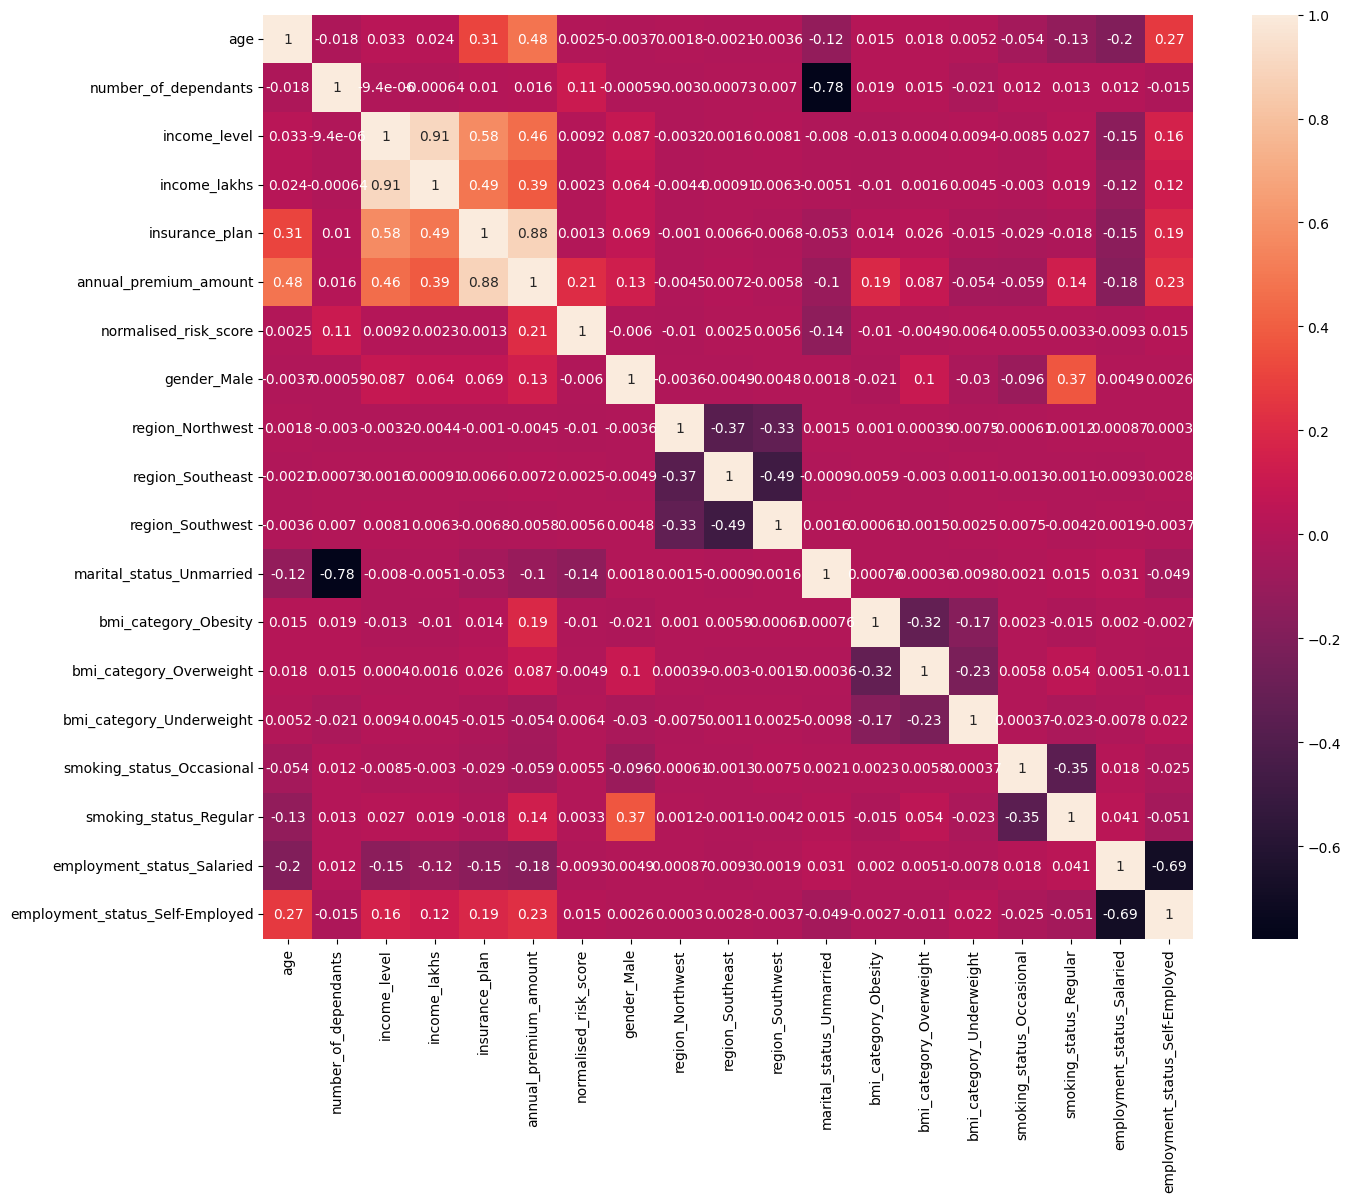

In [153]:
cor = df2_encode.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True)

In [154]:
df2_encode.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [155]:
x = df2_encode.drop('annual_premium_amount',axis=1)
y = df2_encode['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scale = MinMaxScaler()

x[col_to_scale] = scale.fit_transform(x[col_to_scale])
x.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [156]:
x.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
def cal_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['vif'] = [variance_inflation_factor (data.values,i) for i in range(data.shape[1])]
    return vif_df

In [158]:
cal_vif(x)

,column,vif
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,normalised_risk_score,3.810619
6,gender_Male,2.599098
7,region_Northwest,2.123965
8,region_Southeast,2.980842
9,region_Southwest,2.710097


In [159]:
cal_vif(x.drop('income_level',axis=1))

,column,vif
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,normalised_risk_score,3.808345
5,gender_Male,2.591439
6,region_Northwest,2.123277
7,region_Southeast,2.979899
8,region_Southwest,2.708641
9,marital_status_Unmarried,2.345757


In [160]:
x_redused = x.drop('income_level',axis=1)
x_redused.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [161]:
x_train,x_test,y_train,y_test = train_test_split(x_redused,y,test_size=0.3,random_state=42)

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (20875, 17)
x_test (8947, 17)
y_train (20875,)
y_test (8947,)


In [162]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_test = model_lr.predict(x_test)
y_pred_train = model_lr.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9507718572422549
Test Accuracy 0.952671122490868


In [163]:
model_lr.coef_

array([ 7014.39496675, -1247.79337884,  -748.5047392 , 14840.07632438,
        6029.14742861,    42.76580366,   -76.16565671,   -25.08331687,
         -53.33779201,  -702.17193058,  3930.46262822,  1999.07429281,
         598.45525871,   855.18031748,  2816.79153464,   -73.4601338 ,
         248.75420828])

In [164]:
model_lr.intercept_

np.float64(5923.857616247886)

In [165]:
feature_imp = model_lr.coef_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)
cof_df

,coefficents
insurance_plan,14840.076324
age,7014.394967
normalised_risk_score,6029.147429
bmi_category_Obesity,3930.462628
smoking_status_Regular,2816.791535
bmi_category_Overweight,1999.074293
smoking_status_Occasional,855.180317
bmi_category_Underweight,598.455259
employment_status_Self-Employed,248.754208
gender_Male,42.765804


<Axes: xlabel='coefficents', ylabel='None'>

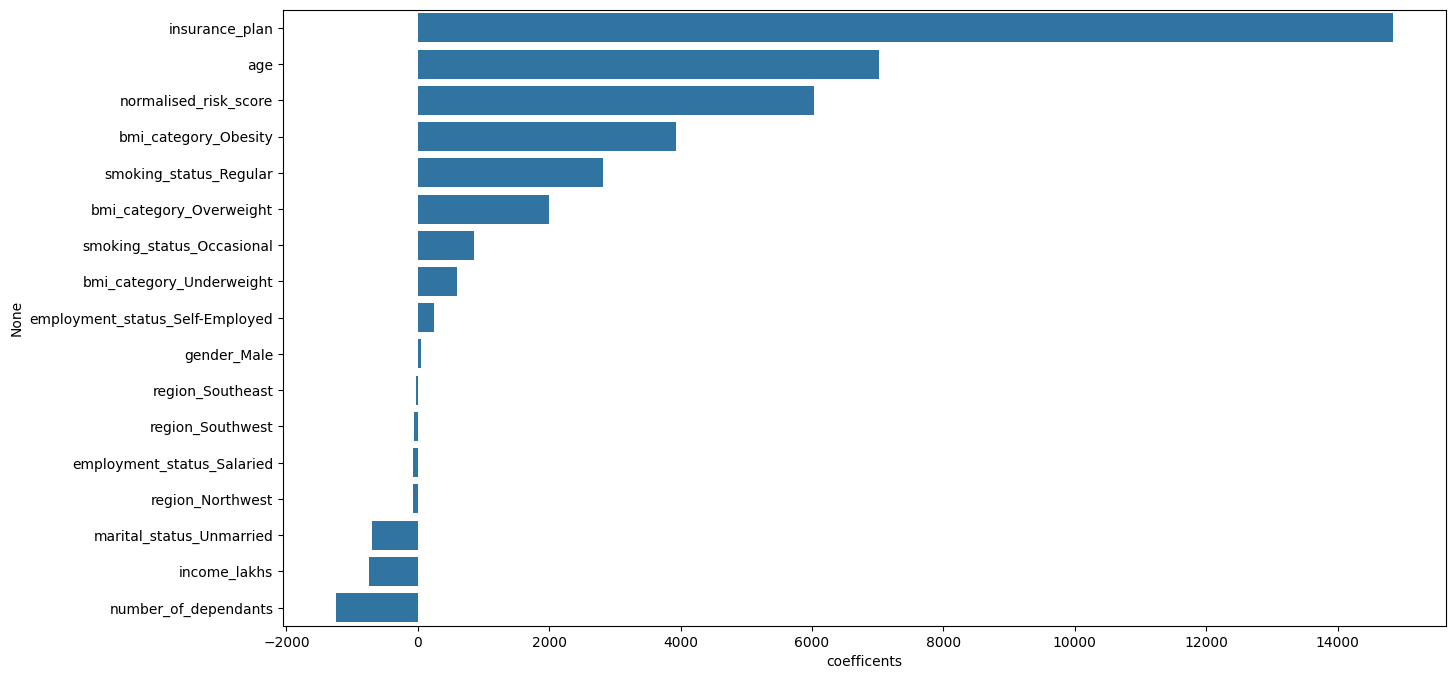

In [166]:
plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)


In [167]:
model_rg = Ridge()
model_rg.fit(x_train,y_train)
y_pred_test = model_rg.predict(x_test)
y_pred_train = model_rg.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.950736906539974
Test Accuracy 0.9526384057860008


In [168]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9986385107040405
Test Accuracy 0.997999370098114


In [169]:
params_grid ={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}

random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)
random_cv.fit(x_train,y_train)
random_cv.best_score_

np.float64(0.9970021843910217)

In [170]:
best_model = random_cv.best_estimator_

In [171]:
random_cv.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

<Axes: xlabel='coefficents', ylabel='None'>

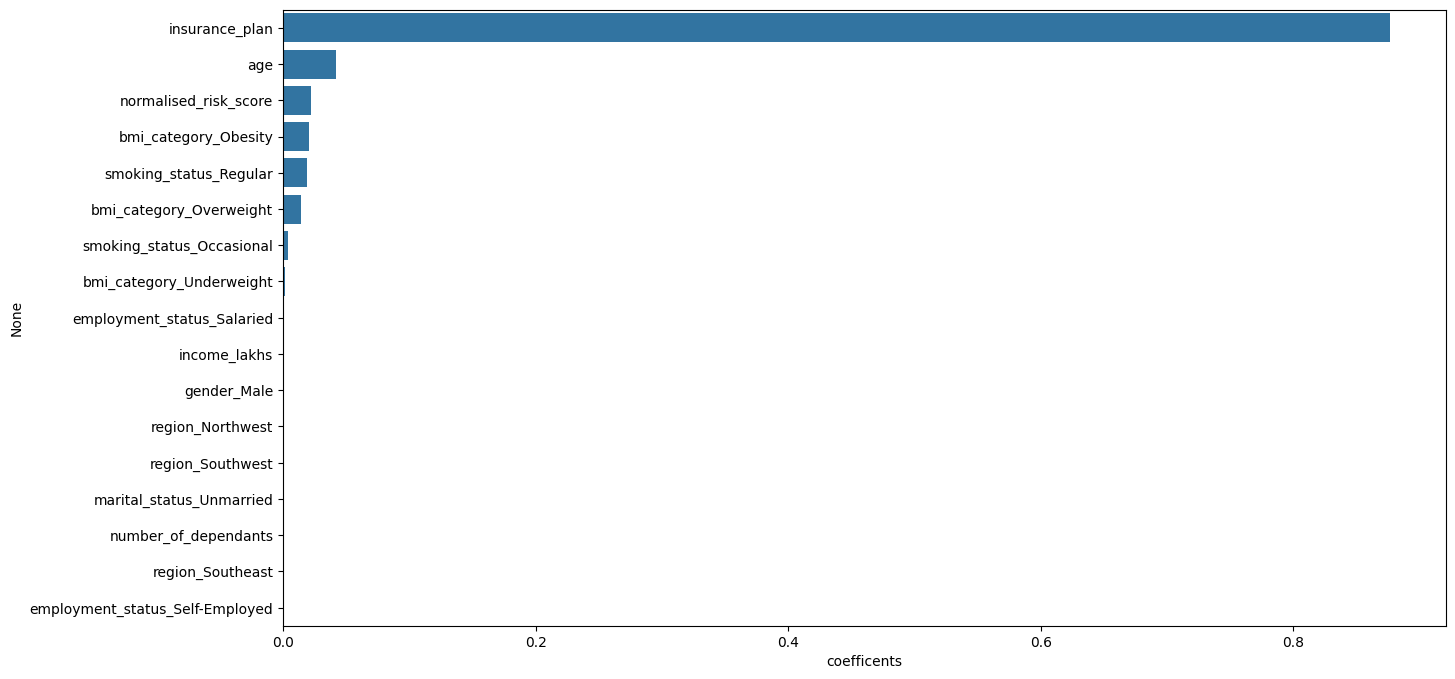

In [172]:
feature_imp = best_model.feature_importances_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)

## Error Analysis

In [173]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

result_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})

result_df.head() 

,actual,predicted,diff,diff_pct
5495,30838,31168.615234,330.615234,1.072103
582,26306,26138.769531,-167.230469,-0.635712
281,17983,17611.283203,-371.716797,-2.067046
15443,19345,18925.240234,-419.759766,-2.169862
24281,33317,33256.734375,-60.265625,-0.180886


<Axes: xlabel='diff_pct', ylabel='Count'>

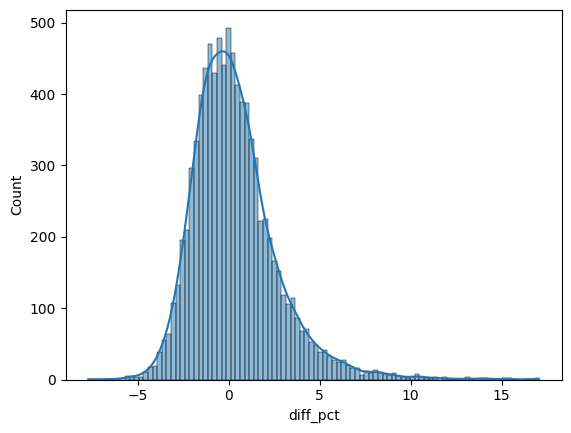

In [174]:
sns.histplot(result_df['diff_pct'],kde=True)

In [175]:
error_threshold = 10
error_df = result_df[np.abs(result_df['diff_pct']>error_threshold)]
error_df.shape

(45, 4)

In [176]:
result_df.shape

(8947, 4)

In [192]:
# percentage of extrime error

extreme_error_pct = error_df.shape[0]*100/result_df.shape[0]
extreme_error_pct

0.5029618866659216

here it says that more then 15% of the recoreds show an error margen of more then 10%

In [178]:
result_df[np.abs(result_df['diff_pct']>50)].sort_values('diff_pct',ascending=False)

,actual,predicted,diff,diff_pct


In [179]:
x_test.index

Index([ 5495,   582,   281, 15443, 24281, 13879, 23869,  9985,  1989, 29096,
       ...
        9378, 21318, 11748, 12471, 27270, 12305,  2117, 23521, 29683, 11077],
      dtype='int64', length=8947)

In [180]:
error_df.index

Index([17866,   252, 11864, 16263, 28595, 14286,  8506,  6137, 11779,   508,
        7028, 29165,  8216, 25617, 27518,  2037, 12841, 11019, 22549, 12005,
        5588, 11231,  9150, 14521, 26591, 29657, 26994,  7509,  1648,  8270,
       10020,  6369,  7508, 15413, 18834, 21455, 22941, 17811, 21399, 21910,
       15581, 11189,  5179, 19807,  5348],
      dtype='int64')

In [181]:
x_test.loc[error_df.index]

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
17866,0.152174,0.6,0.060606,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,1,0
252,0.065217,0.6,0.020202,0.0,0.000000,1,0,1,0,0,0,0,0,1,0,0,0
11864,0.043478,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,0,0,0,0,1,0
16263,0.673913,0.6,0.383838,0.0,0.000000,1,1,0,0,0,0,0,0,0,0,0,0
28595,0.217391,0.0,0.303030,0.0,0.000000,0,0,0,1,1,0,0,0,1,0,0,1
14286,0.021739,0.6,0.050505,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
8506,0.391304,0.6,0.060606,0.0,0.000000,1,0,0,1,0,0,0,0,0,0,0,0
6137,0.369565,0.2,0.040404,0.0,0.000000,1,0,0,1,1,0,0,0,0,0,0,0
11779,0.000000,0.2,0.060606,0.0,0.000000,0,0,1,0,1,0,0,0,0,0,1,0
508,0.326087,0.2,0.050505,0.0,0.428571,0,1,0,0,1,0,0,0,0,0,1,0


In [182]:
extreme_error_df = x_test.loc[error_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
17866,0.152174,0.6,0.060606,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0
252,0.065217,0.6,0.020202,0.0,0.0,1,0,1,0,0,0,0,0,1,0,0,0
11864,0.043478,0.2,0.020202,0.0,0.0,1,0,0,1,1,0,0,0,0,0,1,0
16263,0.673913,0.6,0.383838,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0
28595,0.217391,0.0,0.303030,0.0,0.0,0,0,0,1,1,0,0,0,1,0,0,1


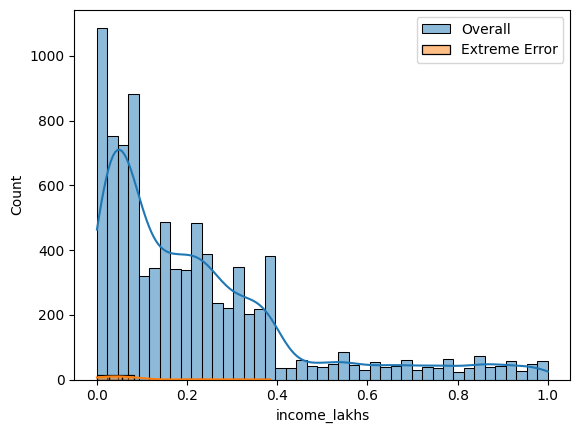

In [183]:
sns.histplot(x_test['income_lakhs'],label='Overall',kde=True)
sns.histplot(extreme_error_df['income_lakhs'],label='Extreme Error',kde=True)
plt.legend()
plt.show()

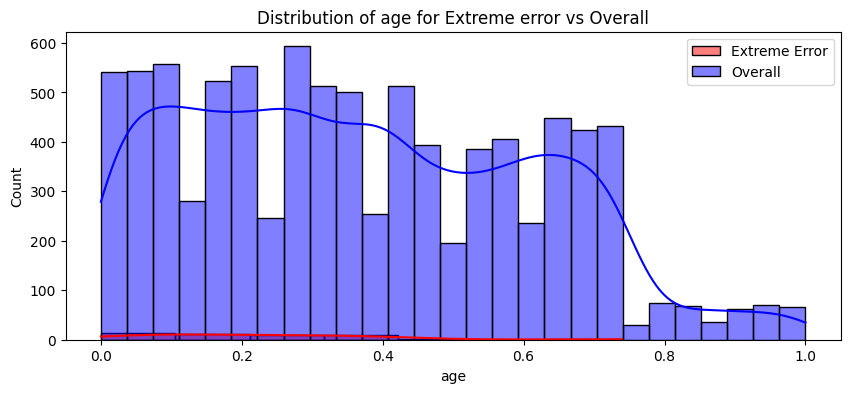

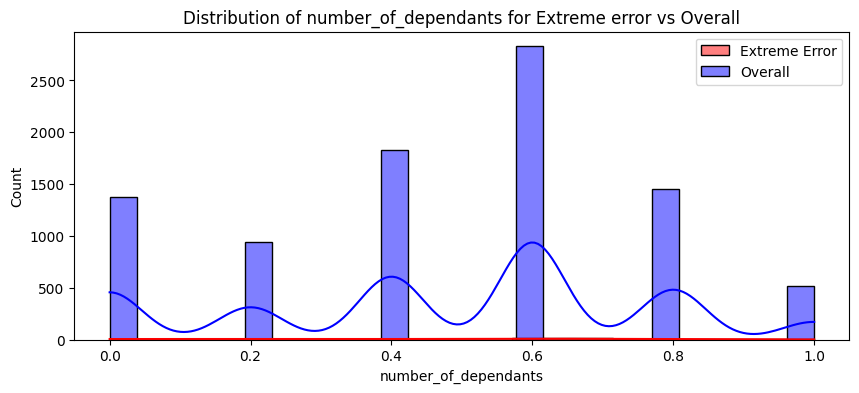

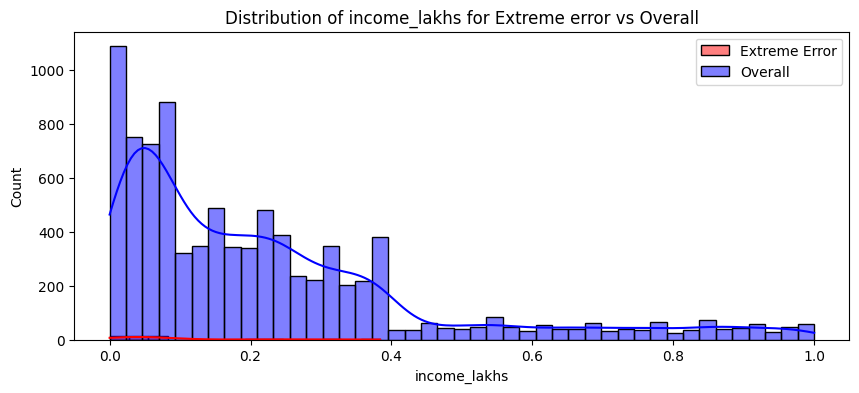

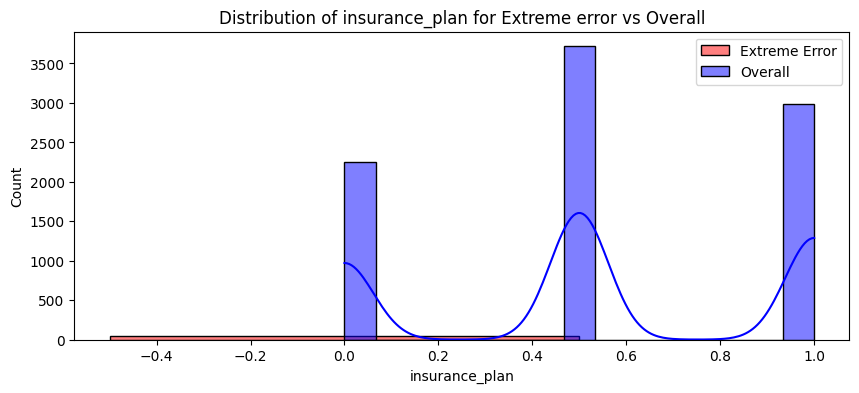

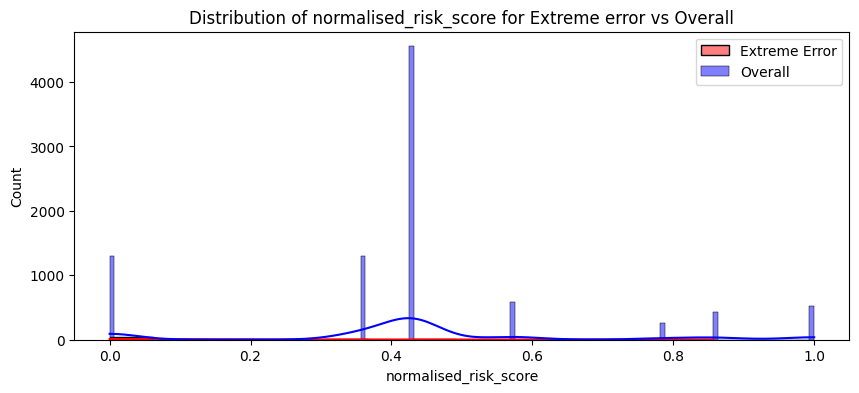

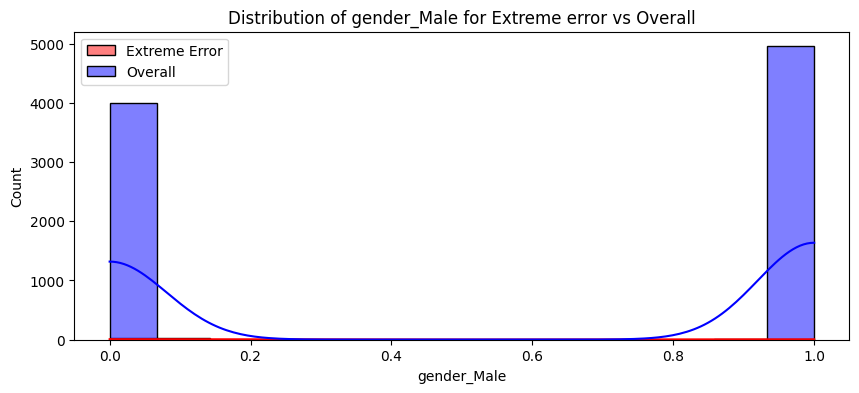

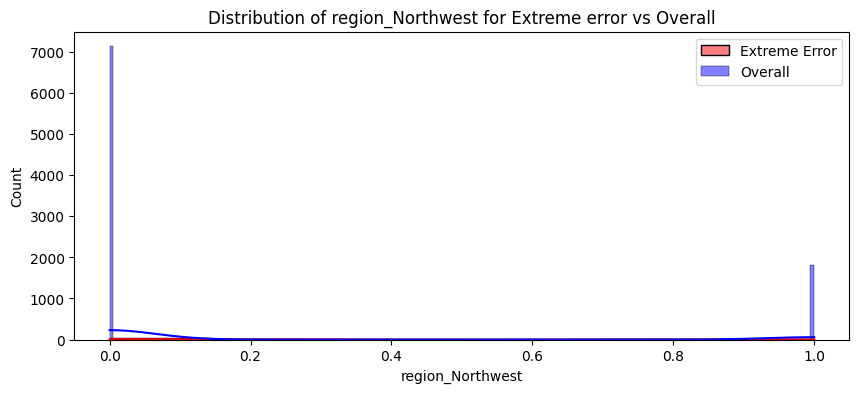

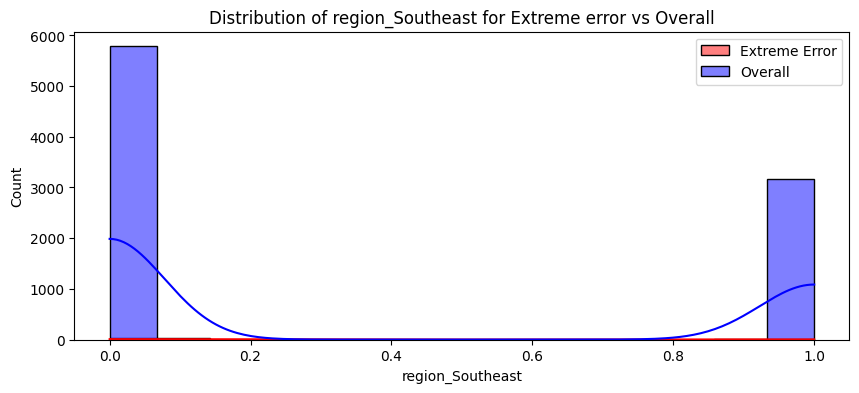

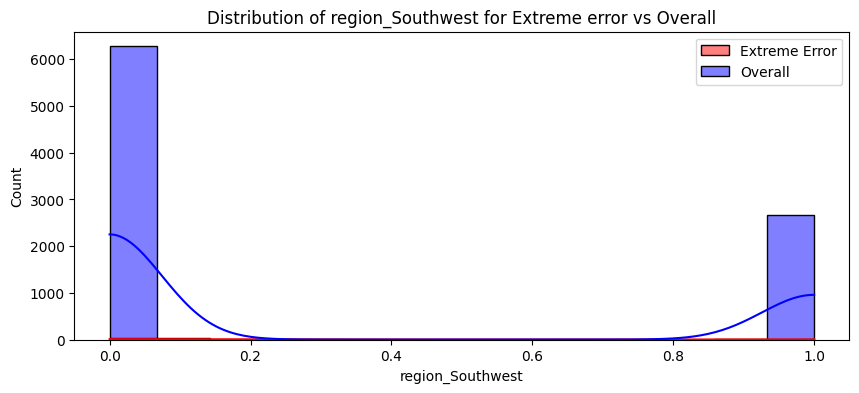

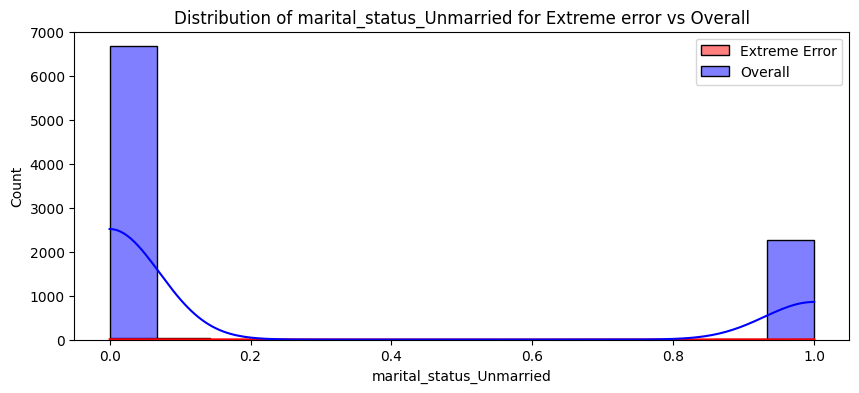

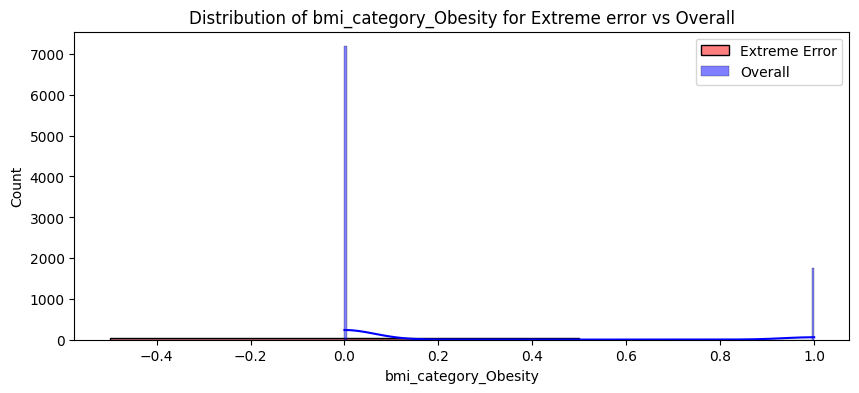

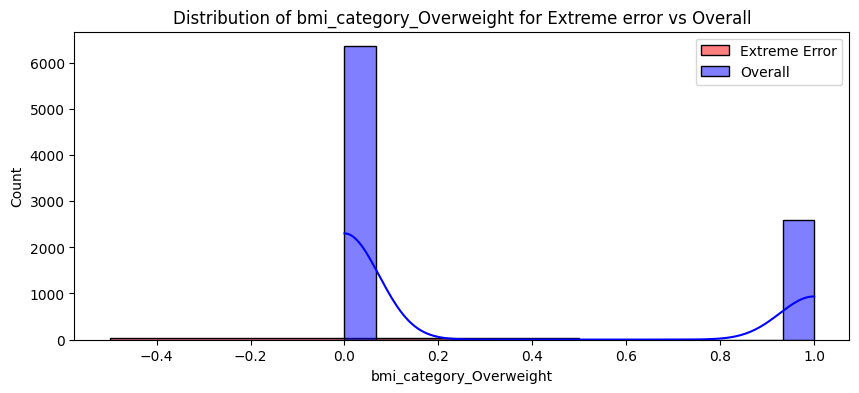

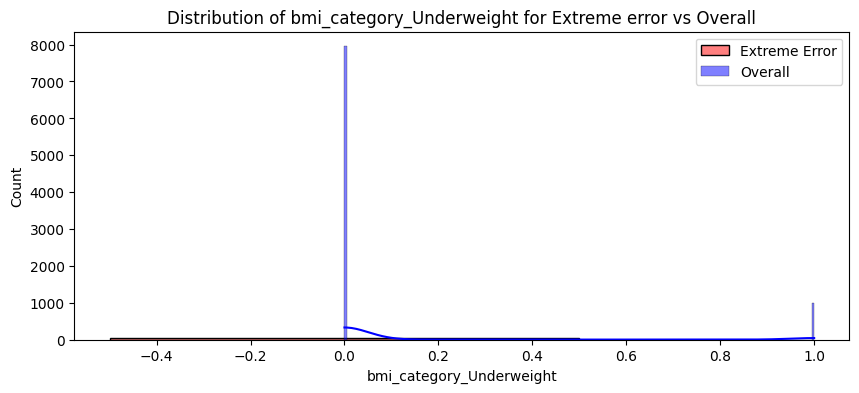

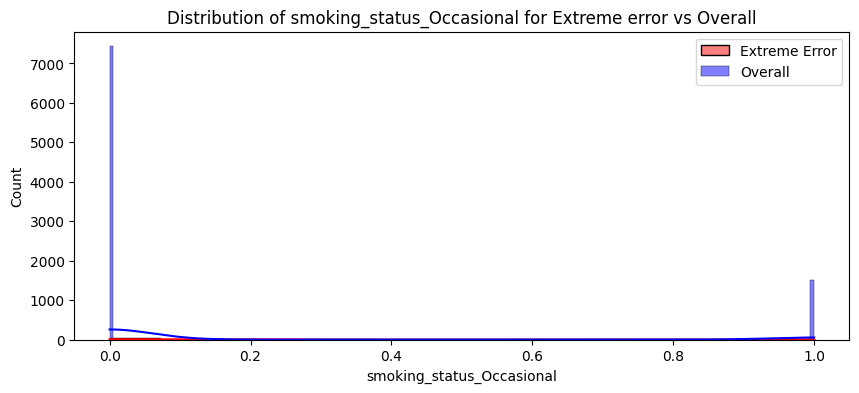

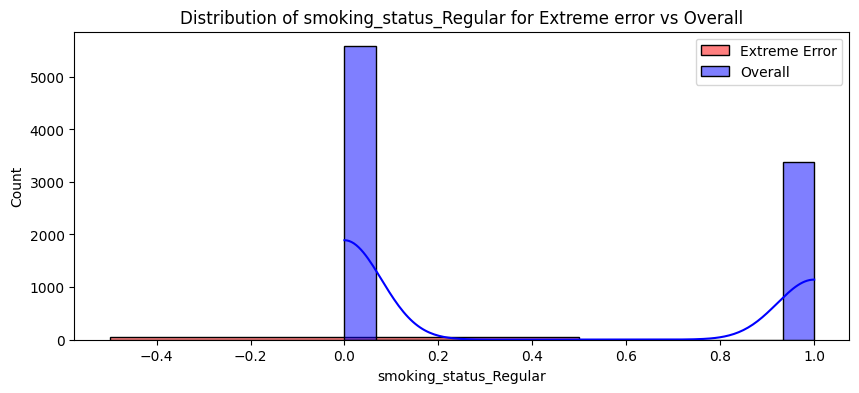

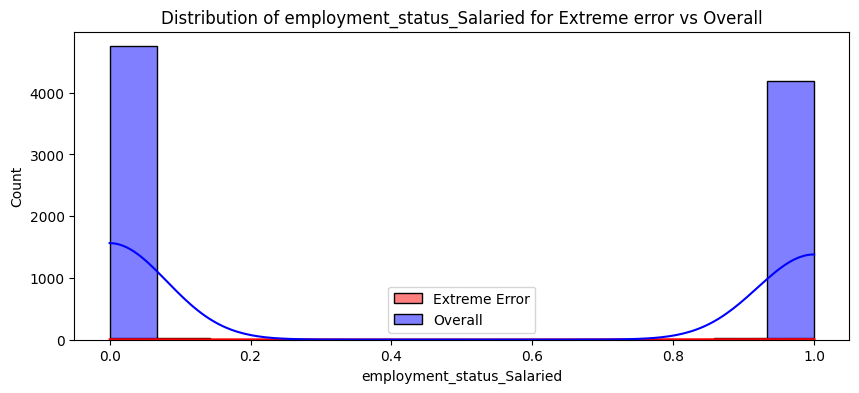

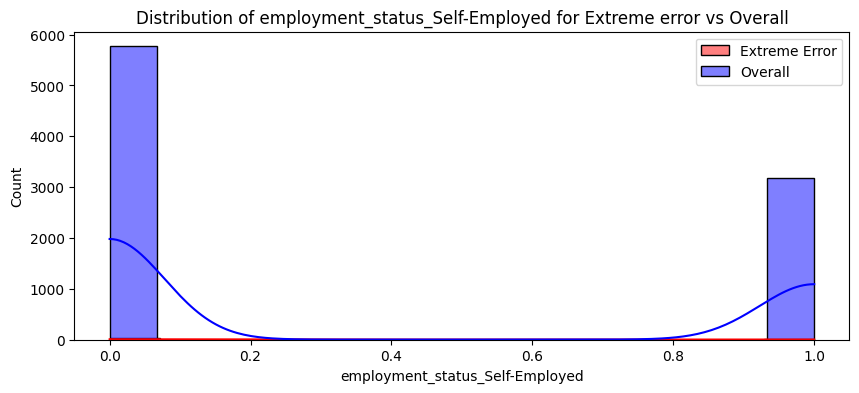

In [184]:
for x in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_error_df[x],color='red',label='Extreme Error',kde=True)
    sns.histplot(x_test[x],color='blue',label='Overall',alpha=0.5,kde=True)
    plt.legend()
    plt.title(f'Distribution of {x} for Extreme error vs Overall')
    plt.show()

here we saw that the kbe is differen in `age`

<Axes: xlabel='age', ylabel='Count'>

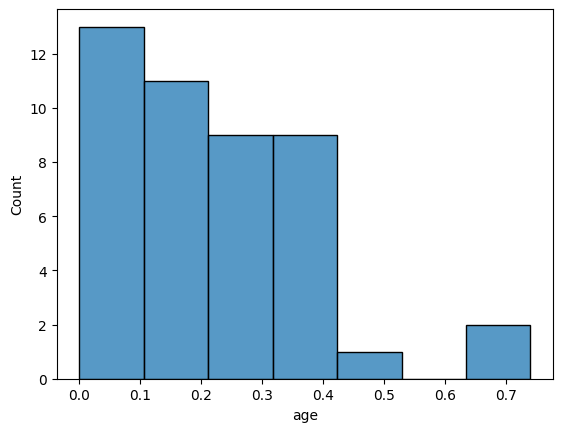

In [185]:
sns.histplot(extreme_error_df.age)

In [186]:
extreme_error_df['income_level'] =-1

In [187]:
df_reverse = pd.DataFrame()
df_reverse[col_to_scale] = scale.inverse_transform(extreme_error_df[col_to_scale])
df_reverse.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,33.0,3.0,-2.0,7.0,1.0
1,29.0,3.0,-2.0,3.0,1.0
2,28.0,1.0,-2.0,3.0,1.0
3,57.0,3.0,-2.0,39.0,1.0
4,36.0,0.0,-2.0,31.0,1.0


<Axes: xlabel='age', ylabel='Count'>

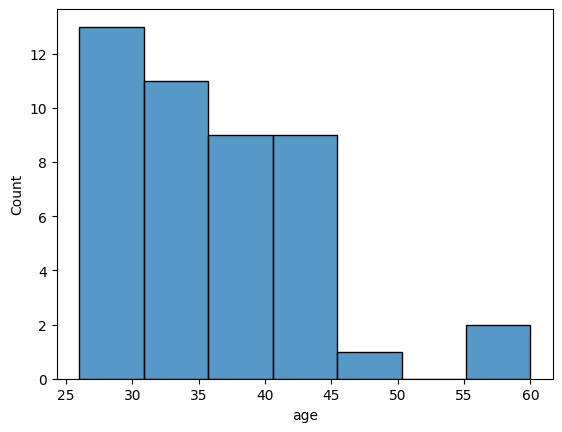

In [188]:
sns.histplot(df_reverse.age)

In [189]:
df_reverse.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,45.000000,45.000000,45.0,45.000000,45.0
mean,36.200000,2.088889,-2.0,7.688889,1.0
std,7.641394,1.474360,0.0,7.908058,0.0
min,26.000000,0.000000,-2.0,1.000000,1.0
25%,30.000000,1.000000,-2.0,3.000000,1.0
50%,35.000000,3.000000,-2.0,6.000000,1.0
75%,41.000000,3.000000,-2.0,8.000000,1.0
max,60.000000,5.000000,-2.0,39.000000,1.0


In [190]:
df_reverse['age'].quantile(0.95)

np.float64(45.8)